In [4]:
import csv

def fix_turnstile_data(filenames): #accepts a list ['filname1','filename2'......], 
    #breaks each row of each file into individual records and returns a clean file
    '''
    Filenames is a list of MTA Subway turnstile text files. A link to an example
    MTA Subway turnstile text file can be seen at the URL below:
    http://web.mta.info/developers/data/nyct/turnstile/turnstile_110507.txt
    
    As you can see, there are numerous data points included in each row of the
    a MTA Subway turnstile text file. 

    You want to write a function that will update each row in the text
    file so there is only one entry per row. A few examples below:
    A002,R051,02-00-00,05-28-11,00:00:00,REGULAR,003178521,001100739
    A002,R051,02-00-00,05-28-11,04:00:00,REGULAR,003178541,001100746
    A002,R051,02-00-00,05-28-11,08:00:00,REGULAR,003178559,001100775
    
    Write the updates to a different text file in the format of "updated_" + filename.
    For example:
        1) if you read in a text file called "turnstile_110521.txt"
        2) you should write the updated data to "updated_turnstile_110521.txt"

    The order of the fields should be preserved. 
    
    You can see a sample of the turnstile text file that's passed into this function
    and the the corresponding updated file in the links below:
    
    Sample input file:
    https://www.dropbox.com/s/mpin5zv4hgrx244/turnstile_110528.txt
    Sample updated file:
https://www.dropbox.com/s/074xbgio4c39b7h/solution_turnstile_110528.txt
    '''
    
    for name in filenames:
    #open reader read file, write file, reader, and writer
        with open(name, "rb") as f, open("updated_" + name, "wb") as fw: # open reader and writer and establish name of write file
                reader = csv.reader(f)
                writer = csv.writer(fw)
                #start parsing read file by row
                for row in reader:
                    header = row[:3] #columns 1-3 , the remaining entries in each row apply to this header data
                    #list comprehension, fields repeat every 5 columns, slice out every 5 until the end of the row and put them in the list lines
                    lines = [row[x:x+5] for x in range(3, len(row), 5)] 
                    # iterate over lines, combine each element of lines with the header and write it to a file as named above
                    for item in lines:
                        writer.writerow(header + item)

In [5]:
fix_turnstile_data(['turnstile_110507.txt'])

In [6]:
def create_master_turnstile_file(filenames, output_file): #accepts filename list and combines contents into a single master file 
    #names as the output_file argument
    '''
    Write a function that takes the files in the list filenames, which all have the 
    columns 'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn', and consolidates
    them into one file located at output_file.  There should be ONE row with the column
    headers, located at the top of the file.
    
    For example, if file_1 has:
    'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
    line 1 ...
    line 2 ...
    
    and another file, file_2 has:
    'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
    line 3 ...
    line 4 ...
    line 5 ...
    
    We need to combine file_1 and file_2 into a master_file like below:
     'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
    line 1 ...
    line 2 ...
    line 3 ...
    line 4 ...
    line 5 ...
    '''
    with open(output_file, 'w') as master_file: # open a file object
        master_file.write('C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n') #write into the file object using a header argument
        for filename in filenames: #iterate over the filename list
                with open(filename, 'rb') as f: #open each file name as an object, read each line, write each line to the masterfile
                    f.readline()
                    master_file.writelines(f)

In [7]:
create_master_turnstile_file(['updated_turnstile_110507.txt'],'joeyjoejoe.txt')

In [8]:
import pandas as pd


def filter_by_regular(filename): #accepts a masterfile, reads file and drops it into a PANDAS DataFrame, filters, returns the filtered DataFrame
  
    '''
    This function should read the csv file located at filename into a pandas dataframe,
    and filter the dataframe to only rows where the 'DESCn' column has the value 'REGULAR'.
    
    For example, if the pandas dataframe is as follows:
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231
    
    The dataframe will look like below after filtering to only rows where DESCn column
    has the value 'REGULAR':
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    '''
    data=pd.read_csv(filename)
    data_df=pd.DataFrame(data)
    data_filtered=data_df[data_df['DESCn']=='REGULAR']
    return data_filtered

In [9]:
frame = filter_by_regular('joeyjoejoe.txt')
frame.head()

,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
0,A002,R051,02-00-00,04-30-11,04:00:00,REGULAR,3143547,1087915
1,A002,R051,02-00-00,04-30-11,08:00:00,REGULAR,3143563,1087935
2,A002,R051,02-00-00,04-30-11,12:00:00,REGULAR,3143646,1088024
3,A002,R051,02-00-00,04-30-11,16:00:00,REGULAR,3143865,1088083
4,A002,R051,02-00-00,04-30-11,20:00:00,REGULAR,3144181,1088132


In [10]:
import pandas as pd
'''accepts a PANDAS DataFrame, creates a new column ENTRIESn_hourly assinging a value of 
    the difference between the current and previous row,  #or 1 for any value = NaN, then returns a DataFrame'''
def get_hourly_entries(df): 
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative entry numbers to a count of entries since the last reading
    (i.e., entries since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called ENTRIESn_hourly
       2) Assign to the column the difference between ENTRIESn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 1.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Examples of what your dataframe should look like at the end of this exercise:
    
           C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243
    ...
    ...

    '''
    df["ENTRIESn_hourly"]=df["ENTRIESn"]-df["ENTRIESn"].shift(1)
    df["ENTRIESn_hourly"].fillna(1,inplace = True)
    return df

In [11]:
frame2= get_hourly_entries(frame)
frame.head()

,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly
0,A002,R051,02-00-00,04-30-11,04:00:00,REGULAR,3143547,1087915,1.0
1,A002,R051,02-00-00,04-30-11,08:00:00,REGULAR,3143563,1087935,16.0
2,A002,R051,02-00-00,04-30-11,12:00:00,REGULAR,3143646,1088024,83.0
3,A002,R051,02-00-00,04-30-11,16:00:00,REGULAR,3143865,1088083,219.0
4,A002,R051,02-00-00,04-30-11,20:00:00,REGULAR,3144181,1088132,316.0


In [12]:
import pandas
'''accepts a PANDAS DataFrame, creates a new column EXITSn_hourly assinging a value of 
the difference between the current and previous row,  #or 1 for any value = NaN, then returns a DataFrame'''

def get_hourly_exits(df): 
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative exit numbers to a count of exits since the last reading
    (i.e., exits since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called EXITSn_hourly
       2) Assign to the column the difference between EXITSn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 0.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Example dataframe below:

          Unnamed: 0   C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly  EXITSn_hourly
    0              0  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                0              0
    1              1  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23              8
    2              2  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18             18
    3              3  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71             54
    4              4  A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170             44
    5              5  A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214             42
    6              6  A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87             11
    7              7  A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10              3
    8              8  A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36             89
    9              9  A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153            333
    '''
    df["EXITSn_hourly"]=df["EXITSn"]-df["EXITSn"].shift(1)
    df["EXITSn_hourly"].fillna(0,inplace = True)
    return df

In [13]:
frame3 = get_hourly_exits(frame2)
frame3.head()

,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly
0,A002,R051,02-00-00,04-30-11,04:00:00,REGULAR,3143547,1087915,1.0,0.0
1,A002,R051,02-00-00,04-30-11,08:00:00,REGULAR,3143563,1087935,16.0,20.0
2,A002,R051,02-00-00,04-30-11,12:00:00,REGULAR,3143646,1088024,83.0,89.0
3,A002,R051,02-00-00,04-30-11,16:00:00,REGULAR,3143865,1088083,219.0,59.0
4,A002,R051,02-00-00,04-30-11,20:00:00,REGULAR,3144181,1088132,316.0,49.0


In [14]:
import datetime

def reformat_subway_dates(date): #a function to reformat dates, a tool to enable joining the subway and weather data
    '''
    The dates in our subway data are formatted in the format month-day-year.
    The dates in our weather underground data are formatted year-month-day.
    
    In order to join these two data sets together, we'll want the dates formatted
    the same way.  Write a function that takes as its input a date in the MTA Subway
    data format, and returns a date in the weather underground format.
    
    Hint: 
    There is a useful function in the datetime library called strptime. 
    More info can be seen here:
    http://docs.python.org/2/library/datetime.html#datetime.datetime.strptime
    '''
    new_date=date_formatted = datetime.datetime.strptime(date,'%m-%d-%y').strftime('%Y-%m-%d')
    return new_date

In [15]:
df_turnstile_weather = pd.DataFrame(pd.read_csv('turnstile_data_master_with_weather.csv'))


In [16]:
df_turnstile_weather.head()


,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


In [17]:
%matplotlib inline
import numpy as np
import pandas
import matplotlib.pyplot as plt

def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histograph may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 1].hist(bins = 20) 
    turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 0].hist(bins = 20,alpha = .5) 
    plt.xlabel("ENTRIESn_hourly")
    plt.ylabel('Frequency')
    plt.legend(('Rain','No Rain'))
    return plt

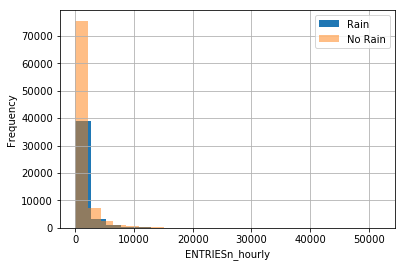

In [18]:
entries_histogram(df_turnstile_weather);

In [19]:
import numpy as np
import scipy
import scipy.stats
import pandas

def mann_whitney_plus_means(turnstile_weather): 
    '''This function accepts a PANDAS DataFrame and respective to ENTRIESn_houly, returns the mean of the raining and not raining conditons
    test statistic, and p value.'''
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    

    with_rain_mean = np.mean(turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain ==1])
    without_rain_mean = np.mean(turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain ==0])
    U, p = scipy.stats.mannwhitneyu(turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain ==1],turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain ==0])
    if p <.05:
        print('Blame it on the Rain!')
    else:
        print('rain is not the reason')
    

In [20]:
mann_whitney_plus_means(df_turnstile_weather)

Blame it on the Rain!


In [21]:
df_turnstile_weather.

SyntaxError: invalid syntax (<ipython-input-21-3a7b65b4ce11>, line 1)

In [22]:
import pandas as pd
from ggplot import *

def plot_weather_data(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data we used in assignment #3.  
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.  

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station
     * Which stations have more exits or entries at different times of day

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
     
    To see all the columns and data points included in the turnstile_weather 
    dataframe. 
     
    However, due to the limitation of our Amazon EC2 server, we are giving you about 1/3
    of the actual data in the turnstile_weather dataframe
    '''
    data = df_turnstile_weather.copy()
    data["datetime"]=pd.to_datetime(data.DATEn + " " + data.TIMEn, format="%Y-%m-%d %H:%M:%S")
    data['datetime'] = pd.to_datetime(data.datetime, format='%Y-%m-%d %H:%M:%S')
    temprdata=data[['datetime','ENTRIESn_hourly','EXITSn_hourly','UNIT']].set_index('datetime').sort_index()
    data_hour=temprdata.resample("H").sum()
    data_hour['hour']=data_hour.index.hour
    plot = ggplot(pd.melt(data_hour,id_vars=['hour']), aes(x='hour', y='value', color='variable')) +\
    geom_line() + ggtitle('Ridership by Hour of Day') + ylab('Entries/Exits')+theme_seaborn()
    return plot, data_hour

In [23]:
ridership_hour_plot,data_hour = plot_weather_data(df_turnstile_weather)

C:\Users\ahmed\Anaconda2\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


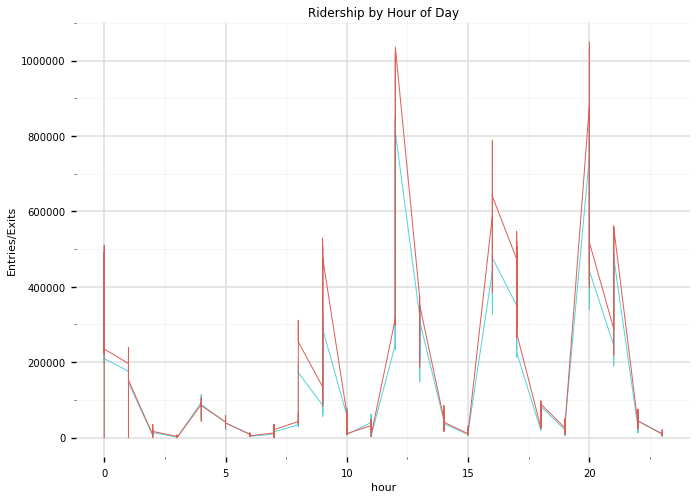

<ggplot: (17768645)>

In [24]:
ridership_hour_plot

In [25]:
data_hour['day']=data_hour.index.weekday

In [26]:
data_day=data_hour.groupby('day')

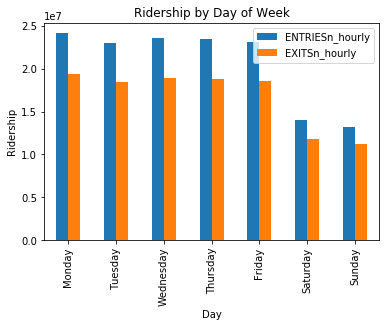

In [27]:
data_day.sum()[['ENTRIESn_hourly','EXITSn_hourly']].plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Ridership')
plt.title('Ridership by Day of Week')
plt.xticks([0,1, 2, 3, 4, 5, 6], ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

In [28]:
import pandas as pd
from ggplot import *

def plot_weather_data_topN(turnstile_weather):
    ''' 
    plot_weather_data is passed a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make another data visualization
    focused on the MTA and weather data we used in Project 3.
    
    Make a type of visualization different than what you did in the previous exercise.
    Try to use the data in a different way (e.g., if you made a lineplot concerning 
    ridership and time of day in exercise #1, maybe look at weather and try to make a 
    histogram in this exercise). Or try to use multiple encodings in your graph if 
    you didn't in the previous exercise.
    
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time-of-day or day-of-week
     * How ridership varies by subway station
     * Which stations have more exits or entries at different times of day

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out the link 
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    to see all the columns and data points included in the turnstile_weather 
    dataframe.
     
    However, due to the limitation of our Amazon EC2 server, we will give you only 
    about 1/3 of the actual data in the turnstile_weather dataframe.
    '''
    data = turnstile_weather.copy()
    data_units = data[['UNIT','ENTRIESn_hourly','EXITSn_hourly']]
    top10 = data_units.groupby('UNIT',as_index=False).sum().sort_values('ENTRIESn_hourly',ascending=False).head(10)
    bot10 = data_units.groupby('UNIT',as_index=False).sum().sort_values('ENTRIESn_hourly',ascending=False).tail(10)
    plot_top = ggplot(pd.melt(top10,id_vars='UNIT'), aes(x='UNIT', y='value',color='variable', fill = 'variable')) +\
    geom_bar(stat = 'identity') +\
    ggtitle('Top 10 Unit Hourly Entries and Exits') + ylab('Entries/Exits') + theme_seaborn()
    
    plot_bot = ggplot(pd.melt(bot10,id_vars='UNIT'), aes(x='UNIT', y='value',color='variable', fill = 'variable')) +\
    geom_bar(stat = 'identity') +\
    ggtitle('Bottom 10 Unit Hourly Entries and Exits') + ylab('Entries/Exits') + theme_seaborn()
    

    
    return top10, bot10, plot_top, plot_bot

In [29]:
top10, bot10,plot_top, plot_bot = plot_weather_data_topN(df_turnstile_weather)

C:\Users\ahmed\Anaconda2\lib\site-packages\ggplot\geoms\geom_bar.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  _reset = self.bottom == None or (self.ax != None and self.ax != ax)


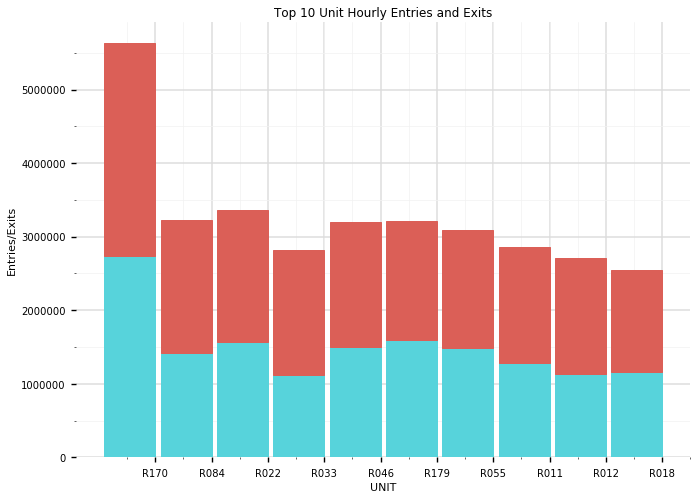

<ggplot: (14142938)>

In [30]:
plot_top

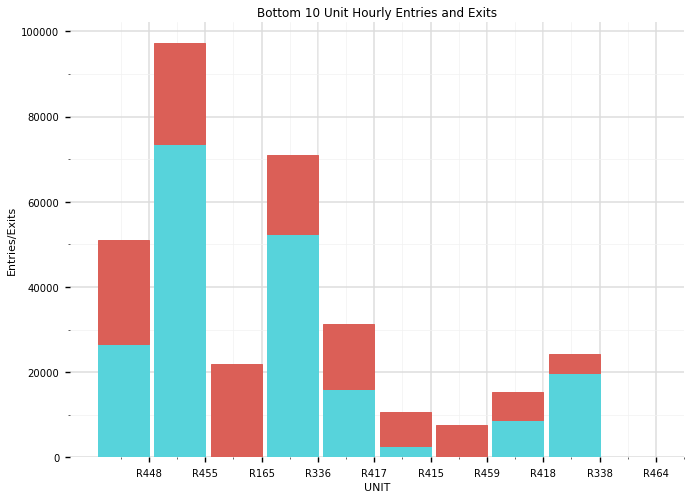

<ggplot: (17708990)>

In [31]:
plot_bot

In [38]:
import numpy as np
import pandas
from ggplot import *

"""
In this question, you need to:
1) implement the compute_cost() and gradient_descent() procedures
2) Select features (in the predictions procedure) and make predictions.

"""

def normalize_features(array):
   """
   Normalize the features in the data set.
   """
   array_normalized = (array-array.mean())/array.std()
   mu = array.mean()
   sigma = array.std()

   return array_normalized, mu, sigma

def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    
    This can be the same code as the compute_cost function in the lesson #3 exercises,
    but feel free to implement your own.
    """
    n = len(values)
    predections=np.dot(features, theta)
    errors=predections-values
    sum_of_square = np.square(errors).sum()
    cost = sum_of_square / (2*n)
    return cost
def gradient_descent(features, values, theta, alpha, num_iterations):
    
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    This can be the same gradient descent code as in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = float(len(values))
    cost_history = []

    for i in range(num_iterations):
        predections=np.dot(features,theta)
        errors=predections-values
        theta = theta - alpha * (1/m) * np.dot(errors,features)
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    return theta, pandas.Series(cost_history)
def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.20 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~15%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this computer on your own computer, locally. 
    
    
    If you'd like to view a plot of your cost history, uncomment the call to 
    plot_cost_history below. The slowdown from plotting is significant, so if you 
    are timing out, the first thing to do is to comment out the plot command again.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a 
    smaller number for num_iterations if that's the case.
    
    If you are using your own algorithm/models, see if you can optimize your code so 
    that it runs faster.
    '''
    features=dataframe[["rain","meanpressurei"]]
    dummies_variables=pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummies_variables)
    values = dataframe[['ENTRIESn_hourly']]
    n = len(values)
    features,mu,sigma=normalize_features(features)
    features['ones'] = np.ones(n)
    features_array = np.array(features)
    values_array = np.array(values).flatten()
    alpha=0.3
    num_iterations = 100
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array,values_array,theta_gradient_descent,alpha,num_iterations)
    plot = None
    # -------------------------------------------------
    # Uncomment the next line to see your cost history
    # -------------------------------------------------
    plot = plot_cost_history(alpha, cost_history)
    # 
    # Please note, there is a possibility that plotting
    # this in addition to your calculation will exceed 
    # the 30 second limit on the compute servers.
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot, features


def plot_cost_history(alpha, cost_history):
   """This function is for viewing the plot of your cost history.
   You can run it by uncommenting this

       plot_cost_history(alpha, cost_history) 

   call in predictions.
   
   If you want to run this locally, you should print the return value
   from this function.
   """
   cost_df = pandas.DataFrame({
      'Cost_History': cost_history,
      'Iteration': range(len(cost_history))
   })
   return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
      geom_point() + ggtitle('Cost History for alpha = %.3f' % alpha )



In [39]:
preds, cost_plot, features = predictions(df_turnstile_weather)

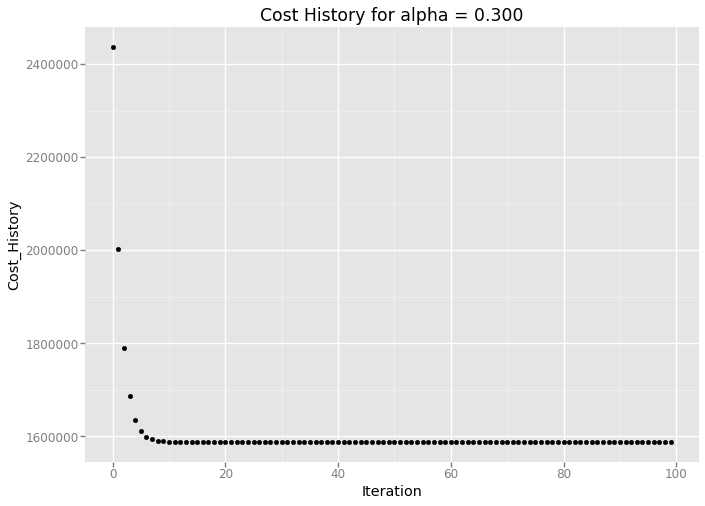

<ggplot: (13446011)>

In [40]:
cost_plot

In [41]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def plot_residuals(turnstile_weather, predictions, start, stop):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    
    plt.figure()
    (turnstile_weather.ENTRIESn_hourly - predictions).hist(bins = 30, range = (start, stop))
    plt.title('Residual Distribution')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    return plt

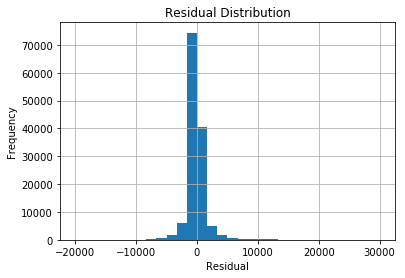

In [42]:
plot_residuals(df_turnstile_weather, preds, -20000,30000);

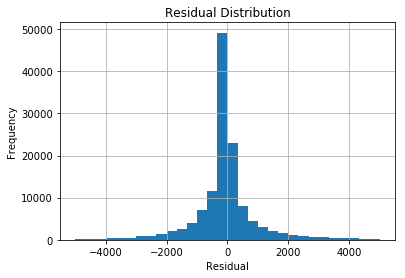

In [43]:
plot_residuals(df_turnstile_weather, preds, -5000,5000);

In [45]:
def compute_r_squared(data, predictions):
    # Write a function that, given two input numpy arrays, 'data', and 'predictions,'
    # returns the coefficient of determination, R^2, for the model that produced 
    # predictions.
    # 
    # Numpy has a couple of functions -- np.mean() and np.sum() --
    # that you might find useful, but you don't have to use them.

    # YOUR CODE GOES HERE
    SSR = ((data - np.mean(data))**2).sum()
    SSE = ((predictions-data)**2).sum()
    r_squared = 1- SSE/ SSR
    return r_squared

In [46]:
compute_r_squared(df_turnstile_weather.ENTRIESn_hourly,preds)

0.41857073499652775

y=0.000000x+(-0.000000)


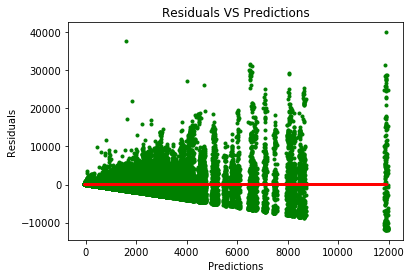

In [49]:
#data

y = df_turnstile_weather.ENTRIESn_hourly - preds
x = preds

# plot the data itself
plt.plot(x,y,'g.')

# calc the trendline
z = np.polyfit(x, y,1)
p = np.poly1d(z)
plt.plot(x,p(x),'r-')
plt.title('Residuals VS Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
print 'y=%.6fx+(%.6f)'%(z[0],z[1])